<a href="https://colab.research.google.com/github/AklimaRimi/who-s-talking/blob/main/data_preprocess_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/AklimaRimi/who-s-talking.git

Cloning into 'who-s-talking'...
remote: Enumerating objects: 819, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 819 (delta 8), reused 16 (delta 7), pack-reused 791
Receiving objects: 100% (819/819), 15.50 GiB | 13.11 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (650/650), done.


In [2]:
! pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 20.1 MB/s eta 0:00:00


In [42]:
import warnings
warnings.filterwarnings('ignore')
import os
import tensorflow as tf
import tensorflow_io as tfio
import ntpath
import matplotlib.pyplot as plt

In [4]:
for i in os.listdir('/content/who-s-talking/augmented-audio'):
  print(i)

Les Brown
Mel Robbins
Nick Vujicic
Rabin Sharma
Eric Thomas
Oprah Winfrey
Simon Sinek
Jay Shetty
Eckhart Tolle
Gary Vee
Brene Brown


In [18]:
Les_Brown = f'/content/who-s-talking/augmented-audio/Les Brown'
Mel_Robbins = f'/content/who-s-talking/augmented-audio/Mel Robbins'
Nick_Vujicic =f'/content/who-s-talking/augmented-audio/Nick Vujicic'
Rabin_Sharma =f'/content/who-s-talking/augmented-audio/Rabin Sharma'
Eric_Thomas =f'/content/who-s-talking/augmented-audio/Eric Thomas'
Oprah_Winfrey =f'/content/who-s-talking/augmented-audio/Oprah Winfrey'
Simon_Sinek =f'/content/who-s-talking/augmented-audio/Simon Sinek'
Jay_Shetty =f'/content/who-s-talking/augmented-audio/Jay Shetty'
Eckhart_Tolle =f'/content/who-s-talking/augmented-audio/Eckhart Tolle'
Gary_Vee =f'/content/who-s-talking/augmented-audio/Gary Vee'
Brene_Brown = f'/content/who-s-talking/augmented-audio/Brene Brown'

In [19]:
path_ls = [Les_Brown,Mel_Robbins,Nick_Vujicic,Rabin_Sharma,Eric_Thomas,
      Oprah_Winfrey,Simon_Sinek,Jay_Shetty,Eckhart_Tolle,Gary_Vee,Brene_Brown]

In [6]:
# for i in os.listdir(Les_Brown):
  # print(i)

In [7]:
Les_Brown

'/content/who-s-talking/augmented-audio/Les Brown'

In [8]:
def load_wav_16k_mono(filename):

  file_contents = tf.io.read_file(filename)
  wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

  wav = tf.squeeze(wav,axis = -1)

  sample_rate = tf.cast(sample_rate,dtype = tf.int64)

  wav = tfio.audio.resample(wav, rate_in = sample_rate, rate_out = 16000)

  return wav



In [20]:
Les_Brown =     tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Les Brown/*.wav')
Mel_Robbins =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Mel Robbins/*.wav')
Nick_Vujicic =  tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Nick Vujicic/*.wav')
Rabin_Sharma =  tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Rabin Sharma/*.wav')
Eric_Thomas =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Eric Thomas/*.wav')
Oprah_Winfrey = tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Oprah Winfrey/*.wav')
Simon_Sinek =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Simon Sinek/*.wav')
Jay_Shetty =    tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Jay Shetty/*.wav')
Eckhart_Tolle = tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Eckhart Tolle/*.wav')
Gary_Vee =      tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Gary Vee/*.wav')
Brene_Brown =   tf.data.Dataset.list_files('/content/who-s-talking/augmented-audio/Brene Brown/*.wav')

In [21]:
Les_Brown =     tf.data.Dataset.zip((Les_Brown, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Les_Brown),), value=0))))
Mel_Robbins =   tf.data.Dataset.zip((Mel_Robbins, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Mel_Robbins),), value=1))))
Nick_Vujicic =  tf.data.Dataset.zip((Nick_Vujicic, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Nick_Vujicic),), value=2))))
Rabin_Sharma =  tf.data.Dataset.zip((Rabin_Sharma, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Rabin_Sharma),), value=3))))
Eric_Thomas =   tf.data.Dataset.zip((Eric_Thomas, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Eric_Thomas),), value=4))))
Oprah_Winfrey = tf.data.Dataset.zip((Oprah_Winfrey, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Oprah_Winfrey),), value=5))))
Simon_Sinek =   tf.data.Dataset.zip((Simon_Sinek, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Simon_Sinek),), value=6))))
Jay_Shetty =    tf.data.Dataset.zip((Jay_Shetty, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Jay_Shetty),), value=7))))
Eckhart_Tolle = tf.data.Dataset.zip((Eckhart_Tolle, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Eckhart_Tolle),), value=8))))
Gary_Vee =      tf.data.Dataset.zip((Gary_Vee, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Gary_Vee),), value=9))))
Brene_Brown = tf.data.Dataset.zip((Brene_Brown, tf.data.Dataset.from_tensor_slices(tf.fill(dims=(len(Brene_Brown),), value=10))))

In [22]:
ls = [Les_Brown,Mel_Robbins,Nick_Vujicic,Rabin_Sharma,Eric_Thomas,
      Oprah_Winfrey,Simon_Sinek,Jay_Shetty,Eckhart_Tolle,Gary_Vee,Brene_Brown]

In [33]:
data = Les_Brown.concatenate(Mel_Robbins)

In [37]:
for i in ls[2:]:
  data = data.concatenate(i)

In [38]:
len(data)

345

In [27]:
Gary_Vee.as_numpy_iterator().next()

(b'/content/who-s-talking/augmented-audio/Gary Vee/21Gary Vee1.wav', 9)

In [30]:
load_wav_16k_mono('/content/who-s-talking/augmented-audio/Les Brown/0Les Brown0.wav')

<tf.Tensor: shape=(4800000,), dtype=float32, numpy=
array([ 0.        ,  0.        ,  0.        , ..., -0.01355633,
       -0.01083288, -0.0129936 ], dtype=float32)>

In [31]:
len(data)

345

In [71]:

def preprocess(file_path, label):
  wav = load_wav_16k_mono(file_path)
  wav = wav[:4800000]

  spectogram = tf.signal.stft(wav, frame_length = 15000, frame_step= 1000 )
  spectogram = tf.abs(spectogram)
  spectogram = tf.expand_dims(spectogram, axis=2)
  return spectogram, label



In [72]:
sp,label = preprocess('/content/who-s-talking/augmented-audio/Gary Vee/21Gary Vee1.wav', 9)

In [73]:
sp

<tf.Tensor: shape=(4786, 8193, 1), dtype=float32, numpy=
array([[[1.4277101e-02],
        [1.7346624e-02],
        [1.7279907e-01],
        ...,
        [4.6834324e-05],
        [4.1351770e-05],
        [3.6239624e-05]],

       [[1.7335415e-02],
        [4.4060502e-02],
        [1.5324508e-01],
        ...,
        [3.5695502e-05],
        [2.9300632e-05],
        [3.8504601e-05]],

       [[1.0723650e-02],
        [5.1290385e-02],
        [1.4085570e-01],
        ...,
        [3.0771338e-05],
        [3.5344507e-05],
        [3.3795834e-05]],

       ...,

       [[7.5612700e-01],
        [1.0305583e+00],
        [1.3947203e+00],
        ...,
        [6.7288660e-05],
        [1.1479273e-04],
        [1.3861060e-04]],

       [[6.1529267e-01],
        [1.0033364e+00],
        [1.4712983e+00],
        ...,
        [4.4506512e-05],
        [1.0064231e-04],
        [1.4117360e-04]],

       [[4.2237750e-01],
        [9.0394157e-01],
        [1.4426203e+00],
        ...,
        [3.588408

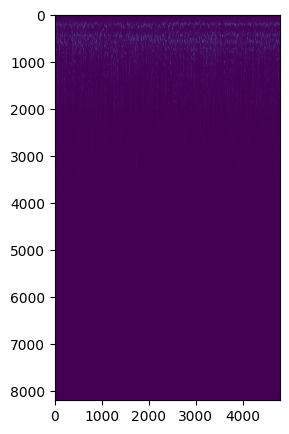

In [74]:
plt.figure(figsize = (25,5))
plt.imshow(tf.transpose(sp)[0])
plt.show()


In [75]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size = 42)
data = data.batch(32)
data = data.prefetch(16)

In [76]:
train =  data.take(300)
test = data.skip(300).take(45)

In [ ]:
features, label = train.as_numpy_iterator().next()

In [ ]:
feature.shape()